In [ ]:
# Load the california housing dataset
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing

data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['MedHouseVal'] = data.target

df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [ ]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [ ]:
# extract the features and target variable
X = df.drop('MedHouseVal', axis=1).values
y = df['MedHouseVal'].values

X

array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]])

In [ ]:
# split into training and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# feature scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
X_train_scaled.shape[1]

8

In [ ]:
import tensorflow as tf
import keras

# build the model
model = keras.models.Sequential([
    keras.Input(shape=(X_train_scaled.shape[1],)),
    keras.layers.Dense(64, activation='relu'), #hidden layer 1
    keras.layers.Dense(32, activation='relu'), #hidden layer 2
    keras.layers.Dense(1) # output = median house value
])

# Compile the model. Optimizer, loss function, and metrics
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# training set = 16000
# batch size = 32
# per epoch, we are going to calculate the loss of 16000/32 batches.

# Training Set: Used to train the model
# Validation Set: Measure the performance of the model on unseen data DURING training
# Test Set: Measure the performance of the model AFTER training
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_split=0.2)

Epoch 1/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 2.2658 - mae: 1.0692 - val_loss: 0.4870 - val_mae: 0.4918
Epoch 2/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4197 - mae: 0.4602 - val_loss: 0.4214 - val_mae: 0.4554
Epoch 3/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3913 - mae: 0.4402 - val_loss: 0.4050 - val_mae: 0.4385
Epoch 4/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3563 - mae: 0.4261 - val_loss: 0.4045 - val_mae: 0.4328
Epoch 5/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3865 - mae: 0.4208 - val_loss: 0.3744 - val_mae: 0.4280
Epoch 6/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3425 - mae: 0.4112 - val_loss: 0.3777 - val_mae: 0.4237
Epoch 7/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3391 - mae: 0.4106 - val_loss: 0.3614 - val_mae: 0.4134
Epoch 8/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3279 - mae: 0.4003 - val_loss: 0.3499 - val_mae: 0.4054
Epoch 9/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/

In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])

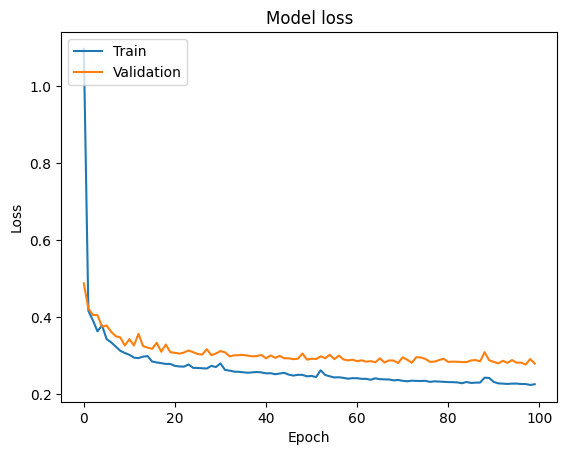

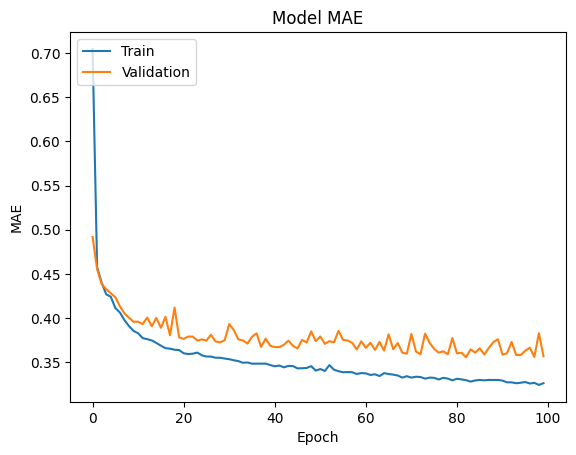

In [ ]:
import matplotlib.pyplot as plt

loss = history_dict['loss']
val_loss = history_dict['val_loss']
plt.plot(loss)
plt.plot(val_loss)
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('Model MAE')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
results = model.evaluate(X_test_scaled, y_test)
results

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2647 - mae: 0.3437


[0.27293530106544495, 0.34697267413139343]

In [ ]:
predictions = model.predict(X_test_scaled)
predictions

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([[0.45135352],
       [0.8939003 ],
       [4.9793983 ],
       ...,
       [4.813791  ],
       [0.76851344],
       [1.7104833 ]], dtype=float32)